In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from nba_api.stats.endpoints.leaguedashplayerstats import LeagueDashPlayerStats

In [2]:
stats_2019 = LeagueDashPlayerStats(per_mode_detailed='PerGame')
stats_2018 = LeagueDashPlayerStats(per_mode_detailed='PerGame', season='2017-18')

In [7]:
data_frame_2019 = stats_2019.get_data_frames()[0]
data_frame_2018 = stats_2018.get_data_frames()[0]

In [43]:
target_data = data_frame_2018[['PLAYER_ID', 'GP', 'FG3M', 'FG3A', 'FG3_PCT']]

In [44]:
target_data.columns = ['PLAYER_ID', 'GP_18', 'FG3M_18', 'FG3A_18', 'FG3_PCT_18']

In [94]:
merged = pd.merge(left=data_frame_2019, right=target_data, on='PLAYER_ID')

In [95]:
merged.loc[:, 'FG3M_DIFF'] = merged.FG3M - merged.FG3M_18

In [96]:
merged.loc[:, 'FG3_PCT_DIFF'] = merged.FG3_PCT - merged.FG3_PCT_18

In [97]:
merged = merged.sort_values(by='FG3M', ascending=False)

In [98]:
merged = merged.loc[merged.FG3M > 1.5]
merged = merged.loc[merged.GP > 20]
merged = merged.loc[merged.GP_18 > 20]

In [99]:
merged = merged.sort_values(by='FG3_PCT_DIFF', ascending=False)

In [100]:
top_10 = merged.iloc[:10][::-1]
top_10.loc[:, 'FG3_PCT'] = top_10.FG3_PCT * 100
top_10.loc[:, 'FG3_PCT_18'] = top_10.FG3_PCT_18 * 100
top_10.loc[:, 'FG3_PCT_DIFF'] = top_10.FG3_PCT_DIFF * 100

In [101]:
plt.style.use('fivethirtyeight')

In [136]:
top_10

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS,GP_18,FG3M_18,FG3A_18,FG3_PCT_18,FG3M_DIFF,FG3_PCT_DIFF
78,202722,Davis Bertans,1610612759,SAS,26.0,76,44,32,0.579,21.5,2.7,6.0,0.450,1.9,4.4,42.9,0.7,0.8,0.883,0.3,3.2,3.5,1.3,0.6,0.5,0.4,0.1,1.8,0.9,8.0,3.4,16.2,0,0,88,77,160,186,223,264,267,224,61,97,31,341,381,38,399,175,233,265,381,314,166,455,260,347,228,55,250,261,38,5,"202722,1610612759",77,1.2,3.3,37.3,0.7,5.6
361,203082,Terrence Ross,1610612753,ORL,28.0,81,42,39,0.519,26.5,5.4,12.7,0.428,2.7,7.0,38.3,1.6,1.8,0.875,0.3,3.1,3.5,1.7,1.1,0.9,0.4,0.3,1.5,1.2,15.1,0.1,24.4,0,0,22,95,78,237,147,90,68,301,12,16,95,164,195,45,381,182,237,214,197,117,219,283,337,262,82,222,133,261,38,5,"203082,1610612753",24,1.3,3.9,32.3,1.4,6.0
324,202704,Reggie Jackson,1610612765,DET,29.0,82,41,41,0.500,27.9,5.4,12.8,0.421,2.1,5.7,36.9,2.5,2.9,0.864,0.5,2.1,2.6,4.2,1.8,0.7,0.1,0.5,2.5,2.3,15.4,0.5,25.4,0,0,1,103,67,251,112,93,67,326,44,45,127,74,94,59,292,312,312,53,77,199,409,169,86,113,77,182,127,261,38,5,"202704,1610612765",45,1.2,3.8,30.8,0.9,6.1
260,1627736,Malik Beasley,1610612743,DEN,22.0,81,53,28,0.654,23.2,4.3,9.1,0.474,2.0,5.0,40.2,0.7,0.8,0.848,0.4,2.0,2.5,1.2,0.7,0.7,0.1,0.4,1.4,0.8,11.3,1.7,17.8,0,0,22,13,220,97,199,132,146,171,53,68,54,346,371,74,342,319,331,288,335,195,396,205,349,360,139,113,221,261,38,5,"1627736,1610612743",62,0.5,1.3,34.1,1.5,6.1
267,203935,Marcus Smart,1610612738,BOS,25.0,80,48,32,0.600,27.5,3.0,7.1,0.422,1.6,4.3,36.4,1.3,1.6,0.806,0.7,2.2,2.9,4.0,1.5,1.8,0.4,0.2,2.5,1.9,8.9,2.1,23.3,1,0,42,38,160,154,122,225,210,324,97,99,147,192,218,156,233,287,281,61,110,8,223,407,91,163,205,91,145,189,38,5,"203935,1610612738",54,1.4,4.6,30.1,0.2,6.3
100,203079,Dion Waiters,1610612748,MIA,27.0,44,20,24,0.455,25.9,4.5,10.9,0.414,2.5,6.6,37.7,0.5,1.0,0.500,0.2,2.5,2.6,2.8,1.5,0.7,0.2,0.5,1.6,1.0,12.0,-0.9,20.4,0,0,326,294,277,321,158,124,102,352,19,22,105,388,321,471,468,248,311,118,132,203,323,157,303,312,126,297,182,261,38,5,"203079,1610612748",30,1.7,5.7,30.6,0.8,7.1
70,201980,Danny Green,1610612761,TOR,31.0,80,56,24,0.700,27.7,3.7,7.9,0.465,2.5,5.4,45.5,0.5,0.6,0.841,0.8,3.2,4.0,1.6,0.9,0.9,0.7,0.2,2.1,0.8,10.3,8.0,21.2,1,0,42,4,277,58,117,175,182,190,20,55,20,406,432,90,215,167,184,221,241,107,91,364,167,367,168,7,173,189,38,5,"201980,1610612761",70,1.7,4.6,36.3,0.8,9.2
69,201568,Danilo Gallinari,1610612746,LAC,30.0,68,40,28,0.588,30.3,6.0,13.0,0.463,2.4,5.5,43.3,5.4,6.0,0.904,0.8,5.3,6.1,2.6,1.5,0.7,0.3,0.6,1.9,4.9,19.8,1.5,32.8,7,0,165,113,220,169,76,63,63,199,27,53,29,12,17,22,209,53,72,125,131,175,230,119,231,23,36,119,57,87,38,5,"201568,1610612746",21,1.7,5.3,32.4,0.7,10.9
73,1627863,Danuel House Jr.,1610612745,HOU,25.0,39,27,12,0.692,25.1,3.0,6.5,0.468,1.9,4.6,41.6,1.4,1.8,0.789,0.6,2.9,3.6,1.0,0.9,0.5,0.3,0.2,2.1,1.1,9.4,4.3,16.8,0,0,354,229,403,65,174,221,241,181,64,90,41,178,189,192,265,205,225,328,250,263,266,414,186,309,189,36,236,261,38,5,"1627863,1610612745",23,0.7,2.5,25.9,1.2,15.7
356,203933,T.J. Warren,1610612756,PHX,25.0,43,10,33,0.233,31.6,6.9,14.2,0.486,1.8,4.2,42.8,2.3,2.9,0.815,0.7,3.3,4.0,1.5,1.2,1.2,0.7,0.7,2.8,2.2,18.0,-5.2,29.4,0,0,331,400,150,475,59,43,47,141,75,105,34,85,93,143,230,158,173,234,180,54,88,76,48,131,50,508,79,261,38,5,"203933,1610612756",65,0.3,1.4,22.2,1.5,20.6


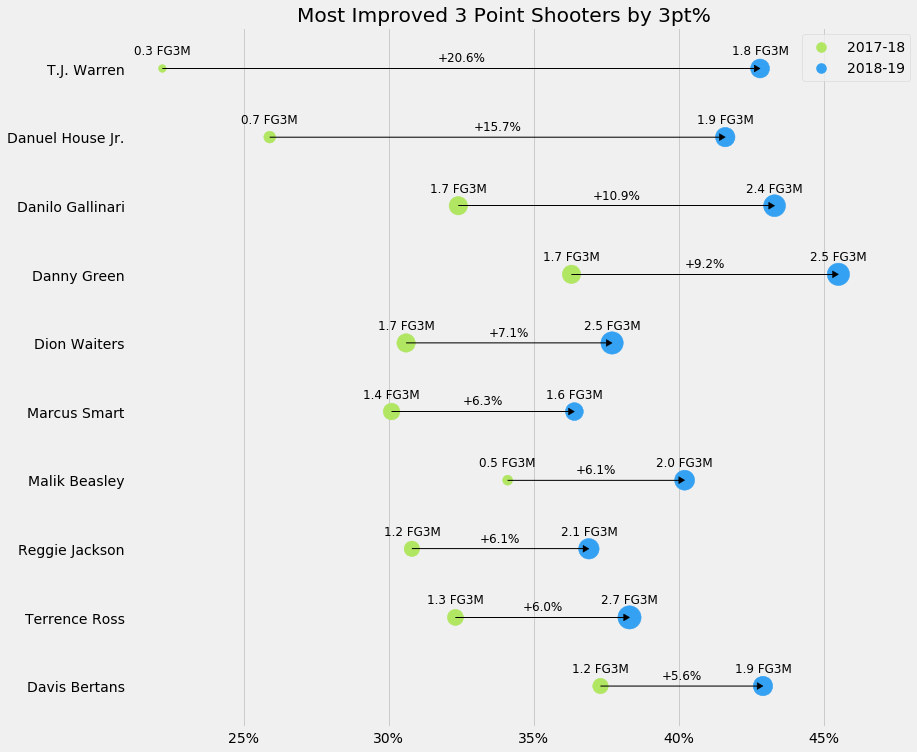

In [232]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.scatter(x=top_10.FG3_PCT_18, y=top_10.PLAYER_NAME, color='#B1E662', s=top_10.FG3M_18 * 200, label='2017-18')
ax.scatter(x=top_10.FG3_PCT, y=top_10.PLAYER_NAME, color='#34A1F2', s=top_10.FG3M * 200, label='2018-19')

ax.grid(False, axis='y')
ax.set_xticklabels([f"{int(number)}%" for number in ax.get_xticks()])

for i in range(len(top_10)):
    item = top_10.iloc[i]
    ax.text(x=item.FG3_PCT_18, y=i+0.2, s=f"{item.FG3M_18} FG3M", ha='center', size=12)
    ax.text(x=item.FG3_PCT, y=i+0.2, s=f"{item.FG3M} FG3M", ha='center', size=12)
    ax.arrow(x=item.FG3_PCT_18, y=i, dx=item.FG3_PCT_DIFF, dy=0, color='black', shape='full', head_length=0.2, head_width=0.1, length_includes_head=True)
    ax.text((item.FG3_PCT + item.FG3_PCT_18) / 2, y=i+0.1, s=f"+{item.FG3_PCT_DIFF:.1f}%", size=12, ha='center')

ax.set_title('Most Improved 3 Point Shooters by 3pt%')
legend = ax.legend(loc='upper right', bbox_to_anchor=(1.05, 1))
legend.legendHandles[0]._sizes = [100]
legend.legendHandles[1]._sizes = [100]